<a href="https://colab.research.google.com/github/aoonging/Big-Data-Analytics/blob/main/Text_Analytics68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1: Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="500" />

ชื่อกลุ่ม: เดินบนถนนคนสู้เพื่อฝันลำพัง

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. น.ส.บุญญารัสมิ์ เสนจันทร์ 663020036-9
2. น.ส.พรพรรณ พัวตนะ 663020037-7
3. น.ส.ภาวิณี หน่อสีดา 663020288-2
4. น.ส.สิริกร บุตรวงษ์ 663020299-7

กำหนดส่ง: อาทิตย์ 5 ตุลาคม 2568 \
รายงานในชั้นเรียน: จันทร์ 6 ตุลาคม 2568

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นในรูปแบบข้อความก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลตัวอักษรเบื้องต้นและสร้าง Data Visualization ที่เหมาะสมได้
----------------------

In [ ]:
"""
หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip install nltk
!pip install wordcloud
!pip install Pillow
"""
# Load these libraries
import json
import pprint
import pandas as pd
import numpy as np
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import seaborn as sns
import re
from collections import Counter
import itertools
from IPython.display import display, Markdown
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import requests
from bs4 import BeautifulSoup
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
from nltk.corpus import stopwords as nltk_stopwords
import matplotlib.font_manager as fm
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


## Problem 1: Working with Twitter Data and JSON file
*หมายเหตุ: ไม่ต้องนำเสนอข้อนี้*

จากข้อมูลทวิตเตอร์เกี่ยวกับประเทศไทยที่เก็บในวันที่ 31 สิงหาคม 2565 ในรูปแบบ JSON จาก `thailand_tweets.txt` ซึ่งมีการดึงข้อมูลมาด้วยคีเวิร์ด "Thailand" ให้ทำการศึกษาข้อมูลและดึงค่าจากข้อมูล \
ทั้งนี้เราสามารถเรียกหน้าทวีตจาก tweet ID ได้ดังนี้
```
twitter.com/anyuser/status/<tweet_id>
```


#### Read JSON file

In [ ]:
# reading data sets from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/MyDrive/data2/thailand_tweets.txt', 'r', encoding='utf-8-sig') as f:
    data = json.loads(json.loads(f.read()))
tweets = pd.DataFrame(list(data.values()))
display(tweets.head())

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
0,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30T23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
1,1564764866598080513,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30T23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2,1564764845685280772,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30T23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
3,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30T23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
4,1564764468277612549,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30T23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,


In [ ]:
data

{'1564764893038882816': {'tweet_id': '1564764893038882816',
  'username': 'matthunter',
  'name': 'MATT HUNTΞR',
  'profile_picture': 'https://twitter.com/matthunter/photo',
  'replies': 2,
  'retweets': 1,
  'likes': 7,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:57+00:00',
  'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
  'hashtags': [],
  'mentions': [],
  'images': [],
  'videos': [],
  'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
  'link': ''},
 '1564764866598080513': {'tweet_id': '1564764866598080513',
  'username': 'DavSmithVP',
  'name': 'DavSmith / Virtual Photography',
  'profile_picture': 'https://twitter.com/DavSmithVP/photo',
  'replies': 0,
  'retweets': 0,
  'likes': 2,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:50+00:00',
  'content': 'Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics',
  'hashtags': ['Virtua

#### Inspect data in JSON format (either reading using pretty print or Pandas data frame)

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
# ----------------- Your code here -----------------
pp = pprint.PrettyPrinter(indent=2, width=120)
pp.pprint(list(data.items())[:1])  # แสดง tweet 2 อันแรก

[ ( '1564764893038882816',
    { 'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
      'hashtags': [],
      'images': [],
      'is_retweet': False,
      'likes': 7,
      'link': '',
      'mentions': [],
      'name': 'MATT HUNTΞR',
      'posted_time': '2022-08-30T23:59:57+00:00',
      'profile_picture': 'https://twitter.com/matthunter/photo',
      'replies': 2,
      'retweets': 1,
      'tweet_id': '1564764893038882816',
      'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
      'username': 'matthunter',
      'videos': []})]


In [ ]:
df = pd.DataFrame(data.values())
print(df.head())       # แสดง 5 แถวแรก
print(df.columns)      # ดูชื่อคอลัมน์


              tweet_id        username                            name  \
0  1564764893038882816      matthunter                     MATT HUNTΞR   
1  1564764866598080513      DavSmithVP  DavSmith / Virtual Photography   
2  1564764845685280772    DailyPattaya               The Pattaya Daily   
3  1564764710804897792   Bryan62766077                           Bryan   
4  1564764468277612549  Megan_and_Grrr                           Megan   

                            profile_picture  replies  retweets  likes  \
0      https://twitter.com/matthunter/photo        2         1      7   
1      https://twitter.com/DavSmithVP/photo        0         0      2   
2    https://twitter.com/DailyPattaya/photo        0         0      0   
3   https://twitter.com/Bryan62766077/photo        1         0      1   
4  https://twitter.com/Megan_and_Grrr/photo        0         0      0   

   is_retweet                posted_time  \
0       False  2022-08-30T23:59:57+00:00   
1       False  2022-08-30T23

#### Report: จงตอบคำถามต่อไปนี้
* The total number of tweets collected in the file
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection \
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
# --- 1. จำนวนทวีตทั้งหมด ---
total_tweets = len(df)
print("1. The total number of tweets collected in the file:", total_tweets)

1. The total number of tweets collected in the file: 29


In [ ]:
# --- 2. เนื้อหาของทวีตแรก ---
first_tweet_content = df.iloc[0]['content']
print("\n2. The content of the first tweet:")
print(first_tweet_content)


2. The content of the first tweet:
Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 


In [ ]:
# --- 3. ตรวจสอบว่าทวีตแรกมี hashtags หรือ mentions ไหม ---
first_tweet_hashtags = df.iloc[0]['hashtags']
first_tweet_mentions = df.iloc[0]['mentions']
print("\n3. Is the first tweet contained any hashtags or mentions?")

# Create a DataFrame to display the information in a table
tweet_info = pd.DataFrame({
    'Information': ['Contains hashtags?', 'Contains mentions?'],
    'Status': [bool(first_tweet_hashtags), bool(first_tweet_mentions)]
})
display(tweet_info)


3. Is the first tweet contained any hashtags or mentions?


,Information,Status
0,Contains hashtags?,False
1,Contains mentions?,False


In [ ]:
#4.Collect all hashtags related to Thailand from this data
all_hashtags = [str(tag)
    for sublist in tweets['hashtags'].dropna()
    for tag in sublist
    if isinstance(tag, str) and tag.strip() != ""
]

# ลบ duplicates และเรียงลำดับ
unique_hashtags_sorted = sorted(set(all_hashtags))

print("All unique hashtags (with #):")
for h in unique_hashtags_sorted:
    print(h)
count = len(unique_hashtags_sorted)
print(f"\nTotal hashtags: {count}")

All unique hashtags (with #):
4
CDNZA
Def
DonnyPangilinan
GOT7
ICYMI
JAYB
LALISA
LISA
MarkTuan
Money
PeckPaLitChoke
SDA2022
Thailand
VirtualPhotography
Zunshine
extraterrestrial
fantasy
faraway
ohmpawat
pattaya
ppkritt
thailand
theotherside
voteforppkritt
ย
เปกผล
갓세븐
제이비

Total hashtags: 29


In [ ]:
print("\nTop 5 most popular tweets:")
display(
    tweets.assign(
        popularity_score=lambda df: df['retweets'] + df['replies'] + df['likes']
    )
    .sort_values(by='popularity_score', ascending=False)
    .head(5)
    [['username', 'content', 'retweets', 'replies', 'likes', 'popularity_score']]
)


Top 5 most popular tweets:


,username,content,retweets,replies,likes,popularity_score
5,OhmPawatInter,Trend twitter update \n\nTop Twitter influence...,99,0,143,242
23,Zeepruk_jfc,Can you help me?\n\ntracking number\nFMP200001...,54,2,32,88
12,o_rung_o1,วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding ...,28,0,15,43
6,nato_tonyo11,Good morning world! And goodmorning to you to...,2,0,18,20
20,Jay_beebee,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...",7,1,7,15


In [ ]:
# 6. Find the most popular tweets

tweets['popularity_score'] = tweets['retweets'] + tweets['replies'] + tweets['likes']
top5_popular_indices = tweets['popularity_score'].nlargest(5).index
print("\nTop 5 most popular tweets:")
display(tweets.loc[top5_popular_indices, ['username', 'content', 'retweets', 'replies', 'likes', 'popularity_score']])


Top 5 most popular tweets:


,username,content,retweets,replies,likes,popularity_score
5,OhmPawatInter,Trend twitter update \n\nTop Twitter influence...,99,0,143,242
23,Zeepruk_jfc,Can you help me?\n\ntracking number\nFMP200001...,54,2,32,88
12,o_rung_o1,วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding ...,28,0,15,43
6,nato_tonyo11,Good morning world! And goodmorning to you to...,2,0,18,20
20,Jay_beebee,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...",7,1,7,15


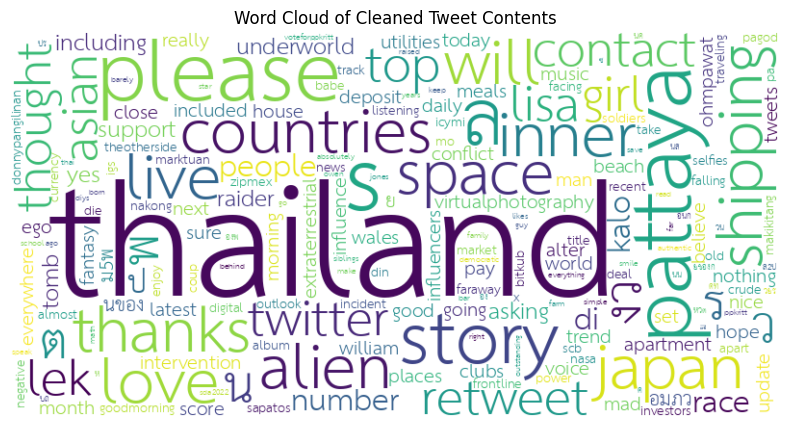

In [ ]:
# 7. Create a word cloud (assuming 'content' is the column to use)
def clean_text(text):
    text = str(text)
    text = text.lower()                               # ทำให้เป็นตัวพิมพ์เล็กทั้งหมด
    text = re.sub(r"http\S+", "", text)               # ลบ URL
    text = re.sub(r"www\S+", "", text)                # ลบ URL ที่ขึ้นต้นด้วย www
    text = re.sub(r"@\w+", "", text)                  # ลบ mentions (@username)
    text = re.sub(r"#", "", text)                     # ลบเครื่องหมาย #
    text = re.sub(r"[^ก-ฮa-zA-Z0-9\s]", " ", text)    # ลบอักขระพิเศษ คงไว้แต่ ก-ฮ a-z 0-9
    text = re.sub(r"\s+", " ", text).strip()          # ตัดช่องว่างซ้ำ ๆ และช่องว่างหัวท้าย
    return text

# ทำการ clean ก่อน
tweets["clean_content"] = tweets["content"].apply(clean_text)

# รวมข้อความที่ถูก clean แล้ว
all_content = " ".join(tweets["clean_content"])

# ทำ word cloud
wordcloud = WordCloud(
    font_path="/content/thsarabunnew-webfont.ttf",  # แก้ไข: เติมชื่อไฟล์ฟอนต์ให้สมบูรณ์
    width=800,
    height=400,
    background_color='white'
).generate(all_content)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Tweet Contents')
plt.show()

## Problem 2: Study Collected Yelp Reviews

![](https://techcrunch.com/wp-content/uploads/2022/08/Yelp-Android_Full-Experience.jpg?w=1390&crop=1)

ดาวน์โหลด Yelp dataset เกี่ยวกับรีวิวของผู้ใช้บริการธุรกิจต่าง ๆ จาก https://www.yelp.com/dataset
<br>
รายละเอียดข้อมูล https://www.yelp.com/dataset/documentation/main
<br>
ให้ศึกษาข้อมูลจากไฟล์ yelp_academic_dataset_review.json, yelp_academic_dataset_business.json, และ yelp_academic_dataset_user.json

### อ่านข้อมูล Reviews, Businesses, และ Users เป็นจำนวน 100,000 รีวิว

In [ ]:
myDirectory = "/content/drive/MyDrive/data2/Yelp JSON/yelp_dataset/"
reviewFilePath = "yelp_academic_dataset_review.json"
businessFilePath = "yelp_academic_dataset_business.json"
userFilePath = "yelp_academic_dataset_user.json"

อ่านข้อมูล review

In [ ]:
# We only use the first 100,000 reviews
n = 100000
reviews = []
with open(myDirectory+reviewFilePath) as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= n:
            break
reviews = pd.DataFrame(reviews)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  int64  
 5   funny        100000 non-null  int64  
 6   cool         100000 non-null  int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


อ่านข้อมูล business

In [ ]:
businesses = []
with open(myDirectory+businessFilePath) as fl:
    for i, line in enumerate(fl):
        businesses.append(json.loads(line))
businesses = pd.DataFrame(businesses)
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


อ่านข้อมูล user

In [ ]:
users = []
with open(myDirectory+userFilePath) as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
users = pd.DataFrame(users)
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


### รวมข้อมูล Reviews, Businesses, และ Users และสำรวจตัวแปรในข้อมูล

In [ ]:
# join reviews and businesses data using inner join
df = pd.merge(reviews, businesses, on='business_id', suffixes=('_review', '_business'))
# join reviews-businesses and users data using inner join
df = pd.merge(df, users, on='user_id', suffixes=('_review_business', '_user'))
df

,review_id,user_id,business_id,stars_review,useful_review_business,funny_review_business,cool_review_business,text,date,name_review_business,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,0,0,0,0,0,0,1,1,0,0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,0,0,0,0,0,0,0,0,0,0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,14,3,1,1,63,96,86,86,49,27
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,1,0,0,0,0,0,0,0,0,0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,0,0,0,0,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4.0,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56,Metro Diner,...,0,0,0,0,0,0,3,3,0,0
99996,xH1AoE-4nf2ECGQJRjO4_g,2clTdtp-BjphxLjN83CpUA,G0xz3kyRhRi6oZl7KfR0pA,1.0,1,0,0,The equipment is so old and so felty! I just u...,2015-04-05 23:31:52,Esporta Fitness,...,0,0,0,0,0,3,0,0,0,0
99997,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4.0,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15,Buena Vista Mexican Restaurant,...,0,0,0,0,1,1,0,0,0,0
99998,6NfkodAdhvI89xONXuBC3A,rnNQzeKJbvqVCsYsL10mkQ,dChRGpit9fM_kZK5pafNyA,2.0,0,0,0,Came here for brunch - had an omlette ($19 + t...,2018-06-11 12:45:08,The Love,...,1,0,0,0,5,1,1,1,0,0


### ทำการสำรวจข้อมูลเบื้องต้น

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_id                     100000 non-null  object 
 1   user_id                       100000 non-null  object 
 2   business_id                   100000 non-null  object 
 3   stars_review                  100000 non-null  float64
 4   useful_review_business        100000 non-null  int64  
 5   funny_review_business         100000 non-null  int64  
 6   cool_review_business          100000 non-null  int64  
 7   text                          100000 non-null  object 
 8   date                          100000 non-null  object 
 9   name_review_business          100000 non-null  object 
 10  address                       100000 non-null  object 
 11  city                          100000 non-null  object 
 12  state                         100000 non-null

###ลบmissing

In [ ]:
df.isnull().sum()
# แทนค่า missing ในคอลัมน์ 'attributes', 'categories', และ 'hours'
df['attributes'] = df['attributes'].fillna('unknown')
df['categories'] = df['categories'].fillna('unknown')
df['hours'] = df['hours'].fillna('{}')

display(df[['attributes','categories','hours']].isnull().sum())

,0
attributes,0
categories,0
hours,0


สำรวจการแจกแจงของจำนวนรีวิวที่แต่ละ user ให้

Distribution of number of reviews per user:


,count
count,79345.000000
mean,1.260319
std,0.956611
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,65.000000



Top 10 users by review count:


,count
user_id,
_BcWyKQL16ndpBdggh2kNA,65
Xw7ZjaGfr0WNVt6s_5KZfA,38
1HM81n6n4iPIFU5d2Lokhw,31
0Igx-a1wAstiBDerGxXk2A,29
Um5bfs5DH6eizgjH3xZsvg,27
ouODopBKF3AqfCkuQEnrDg,26
Jt3GylPuH64uA3zTdbMdCg,26
2iS1vg5TYpV_iEiNC8osTg,22
vYMvOTL31e0KbTo9Hd0tjg,22


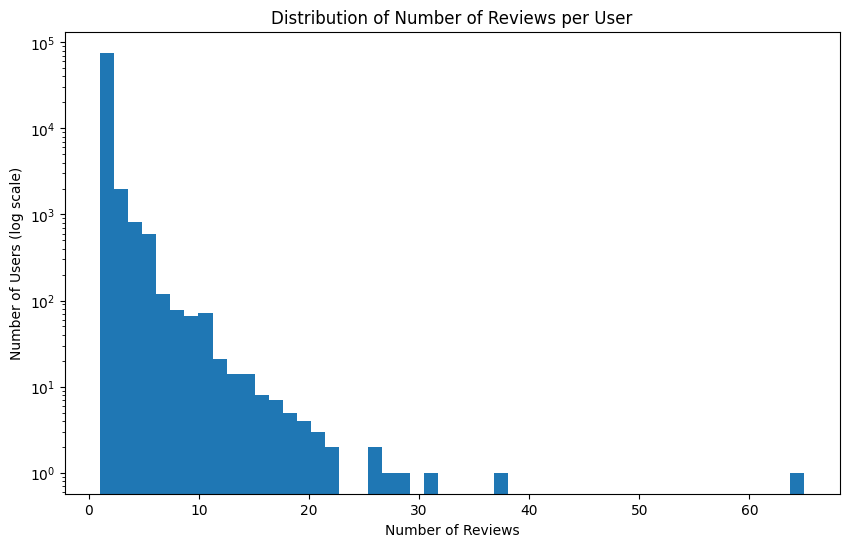

In [ ]:
# Count the number of reviews per user
reviews_per_user = reviews['user_id'].value_counts()

# Display the distribution
print("Distribution of number of reviews per user:")
display(reviews_per_user.describe())

# Optional: Display the top users by review count
print("\nTop 10 users by review count:")
display(reviews_per_user.head(10))

# Optional: Plot a histogram of the review counts
plt.figure(figsize=(10, 6))
plt.hist(reviews_per_user, bins=50, log=True)
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Users (log scale)")
plt.title("Distribution of Number of Reviews per User")
plt.show()

สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

Distribution of review counts per business:


,review_count
count,150346.000000
mean,44.866561
std,121.120136
min,5.000000
25%,8.000000
50%,15.000000
75%,37.000000
max,7568.000000



Distribution of average stars per business:


,stars
count,150346.000000
mean,3.596724
std,0.974421
min,1.000000
25%,3.000000
50%,3.500000
75%,4.500000
max,5.000000



Top 10 businesses by review count:


,name,review_count,stars
113731,Acme Oyster House,7568,4.0
112552,Oceana Grill,7400,4.0
91757,Hattie B’s Hot Chicken - Nashville,6093,4.5
143157,Reading Terminal Market,5721,4.5
147081,Ruby Slipper - New Orleans,5193,4.5
100024,Mother's Restaurant,5185,3.5
31033,Royal House,5070,4.0
31332,Commander's Palace,4876,4.5
4497,Luke,4554,4.0
97331,Cochon,4421,4.0


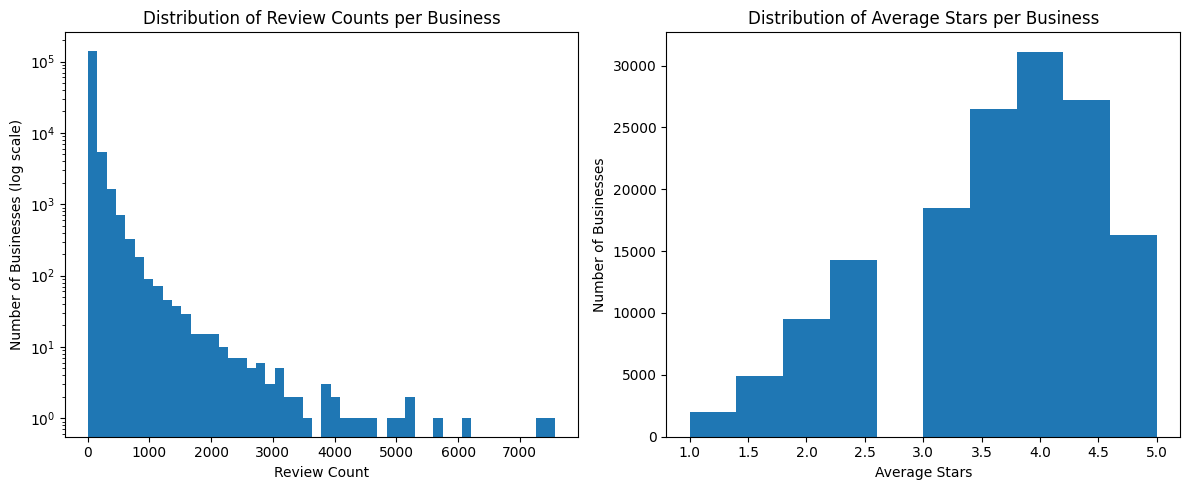

In [ ]:
# Explore the distribution of review counts per business
print("Distribution of review counts per business:")
display(businesses['review_count'].describe())

# Explore the distribution of stars per business
print("\nDistribution of average stars per business:")
display(businesses['stars'].describe())

# Optional: Display the businesses with the most reviews
print("\nTop 10 businesses by review count:")
display(businesses.nlargest(10, 'review_count')[['name', 'review_count', 'stars']])

# Optional: Plot histograms for review count and stars
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(businesses['review_count'], bins=50, log=True)
plt.xlabel("Review Count")
plt.ylabel("Number of Businesses (log scale)")
plt.title("Distribution of Review Counts per Business")

plt.subplot(1, 2, 2)
plt.hist(businesses['stars'], bins=10)
plt.xlabel("Average Stars")
plt.ylabel("Number of Businesses")
plt.title("Distribution of Average Stars per Business")

plt.tight_layout()
plt.show()

มีธุรกิจกี่แบบ และธุรกิจในแต่ละแบบมีจำนวนเท่าไหร่

* ลองแยก `categories` ออกเป็น category ย่อย แล้วสามารถนับหรือใช้ฟังก์ชัน Counter `from collections import Counter` ในการนับจำนวนหรือความถี่ของธุรกิจแต่ละแบบ \
ตัวอย่าง https://www.geeksforgeeks.org/counters-in-python-set-1/

Total number of unique business categories: 1311

Top 20 most common business categories:


[('Restaurants', 52268),
 ('Food', 27781),
 ('Shopping', 24395),
 ('Home Services', 14356),
 ('Beauty & Spas', 14292),
 ('Nightlife', 12281),
 ('Health & Medical', 11890),
 ('Local Services', 11198),
 ('Bars', 11065),
 ('Automotive', 10773),
 ('Event Planning & Services', 9895),
 ('Sandwiches', 8366),
 ('American (Traditional)', 8139),
 ('Active Life', 7687),
 ('Pizza', 7093),
 ('Coffee & Tea', 6703),
 ('Fast Food', 6472),
 ('Breakfast & Brunch', 6239),
 ('American (New)', 6097),
 ('Hotels & Travel', 5857)]

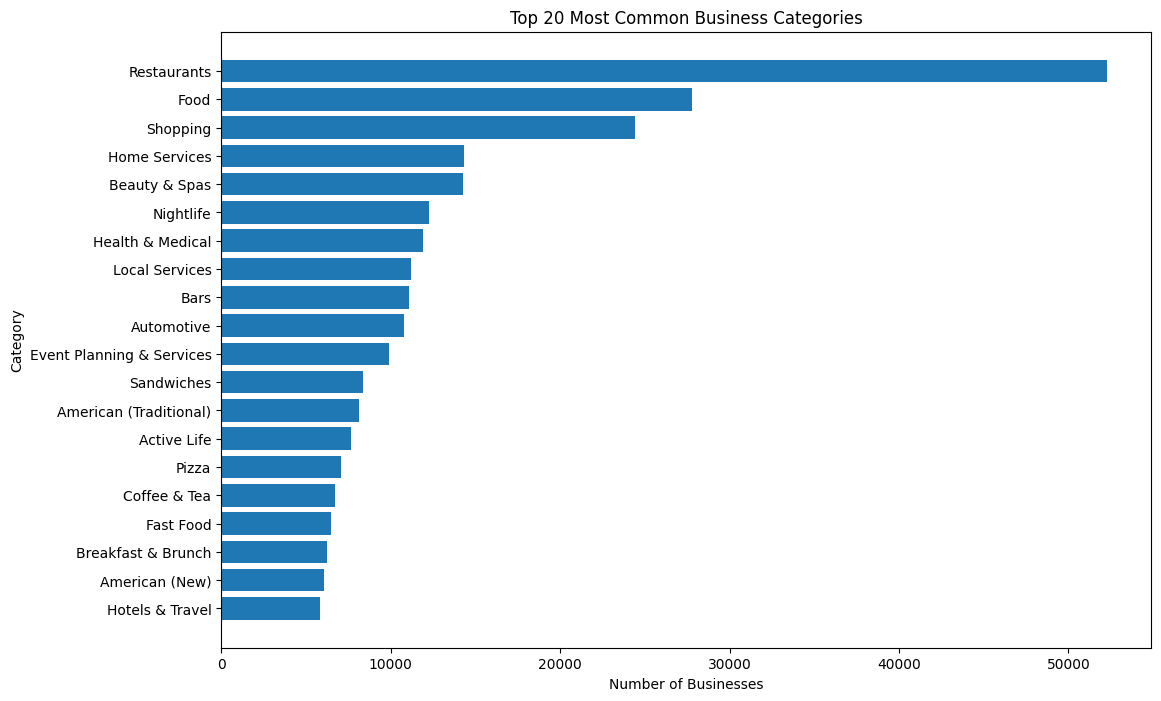

In [ ]:
# Split the categories string into a list of categories for each business
categories_list = businesses['categories'].dropna().str.split(', ')

# Flatten the list of lists into a single list of all categories
all_categories = list(itertools.chain(*categories_list))

# Count the occurrences of each category
category_counts = Counter(all_categories)

print(f"Total number of unique business categories: {len(category_counts)}")
print("\nTop 20 most common business categories:")
display(category_counts.most_common(20))

# Optional: Plot a bar chart of the most common categories
most_common_categories = category_counts.most_common(20)
categories_names = [cat[0] for cat in most_common_categories]
categories_values = [cat[1] for cat in most_common_categories]

plt.figure(figsize=(12, 8))
plt.barh(categories_names, categories_values)
plt.xlabel("Number of Businesses")
plt.ylabel("Category")
plt.title("Top 20 Most Common Business Categories")
plt.gca().invert_yaxis()
plt.show()

### ให้ตั้งปัญหาหรือคำถาม และวิเคราะห์ข้อมูลเพื่อตอบคำถามดังกล่าว

#### 1. ผู้ใช้มักมี bias ต่อธุรกิจหรือไม่

In [ ]:
# หาผู้ใช้ที่ให้ทั้ง 1 และ 5 ดาว
users_1_star = reviews[reviews['stars'] == 1]['user_id'].unique()
users_5_star = reviews[reviews['stars'] == 5]['user_id'].unique()
users_with_mixed_reviews = list(set(users_1_star) & set(users_5_star))

display(Markdown(f"## จำนวนผู้ใช้ที่เคยให้ทั้ง 1 ดาว และ 5 ดาว: **{len(users_with_mixed_reviews)}**"))

# เลือก sample 5 คนแรก
sample_users = users_with_mixed_reviews[:5]

for user_id in sample_users:
   user_reviews = reviews[reviews['user_id'] == user_id].sort_values(by='stars')
   user_name = users[users['user_id'] == user_id]['name'].iloc[0] if user_id in users['user_id'].values else user_id

   display(Markdown(
       f"---\n### 👤 รีวิวจากผู้ใช้: **{user_name}** "
       f"(User ID: `{user_id}`, รีวิวทั้งหมด: {len(user_reviews)})\n"
   ))

   # รีวิว 1 ดาว
   one_star_reviews = user_reviews[user_reviews['stars'] == 1][['stars', 'text', 'date', 'business_id']].head(2)
   if not one_star_reviews.empty:
       display(Markdown("#### ⭐ รีวิว 1 ดาว (ตัวอย่าง):"))
       display(one_star_reviews)
   else:
       display(Markdown("_ไม่มีรีวิว 1 ดาว_"))

   # รีวิว 5 ดาว
   five_star_reviews = user_reviews[user_reviews['stars'] == 5][['stars', 'text', 'date', 'business_id']].head(2)
   if not five_star_reviews.empty:
       display(Markdown("#### 🌟 รีวิว 5 ดาว (ตัวอย่าง):"))
       display(five_star_reviews)
   else:
     display(Markdown("_ไม่มีรีวิว 5 ดาว_"))

## จำนวนผู้ใช้ที่เคยให้ทั้ง 1 ดาว และ 5 ดาว: **894**

---
### 👤 รีวิวจากผู้ใช้: **Bart** (User ID: `6X1sWLwqwTb0ecDP_xi3cg`, รีวิวทั้งหมด: 3)


#### ⭐ รีวิว 1 ดาว (ตัวอย่าง):

,stars,text,date,business_id
40564,1.0,Ok the picture of that hamburger was exactly h...,2015-03-05 22:45:58,P48O-s2OOVq8UBtskQ90tQ


#### 🌟 รีวิว 5 ดาว (ตัวอย่าง):

,stars,text,date,business_id
55478,5.0,Wow this place is great if you have any kind o...,2015-05-29 16:49:10,l6ih6s3hEnz-QpVkrfFZRw


---
### 👤 รีวิวจากผู้ใช้: **Krystal** (User ID: `p0MhNWkwOPBfRo8qUb7faw`, รีวิวทั้งหมด: 11)


#### ⭐ รีวิว 1 ดาว (ตัวอย่าง):

,stars,text,date,business_id
43626,1.0,With a fast food restaurant you are getting th...,2015-02-02 23:40:44,_TANOcxwIOmQhk1mnXaj7w
78716,1.0,So Pep Boys reached out to me to I suppose get...,2015-02-05 22:49:04,Vqc-ibXU4ilVer_L8YbWJg


#### 🌟 รีวิว 5 ดาว (ตัวอย่าง):

,stars,text,date,business_id
63335,5.0,"This review is for the Arcade, more specifical...",2015-06-23 21:54:14,PY9GRfzr4nTZeINf346QOw
56343,5.0,When I write a review about a chain restaurant...,2015-01-06 22:57:51,E6WheRR9KwPwSs7k8Z7h0g


---
### 👤 รีวิวจากผู้ใช้: **Eddie** (User ID: `bopZYAgw1TkueQ8z-o-mhg`, รีวิวทั้งหมด: 2)


#### ⭐ รีวิว 1 ดาว (ตัวอย่าง):

,stars,text,date,business_id
94358,1.0,Gringo Food. Was ready within minutes of order...,2017-03-06 18:46:06,-pRU97z3uPU_M7yUf5yzMg


#### 🌟 รีวิว 5 ดาว (ตัวอย่าง):

,stars,text,date,business_id
28325,5.0,Best south side secret. Don't tell anyone. A l...,2017-03-06 19:00:56,Y3ZCO17N1_T_Ms1JmswwzA


---
### 👤 รีวิวจากผู้ใช้: **Mike** (User ID: `OSI9HHMFQO5UqKQgwV_7Tg`, รีวิวทั้งหมด: 2)


#### ⭐ รีวิว 1 ดาว (ตัวอย่าง):

,stars,text,date,business_id
57849,1.0,"A others have stated, the staff here are rise ...",2017-04-22 19:57:52,h1qdksqlwGpmp_Id8j5CXQ


#### 🌟 รีวิว 5 ดาว (ตัวอย่าง):

,stars,text,date,business_id
46873,5.0,This place is without a doubt the best lunch d...,2018-08-24 16:15:19,INWHqjudS0vDcVKlHyz69A


---
### 👤 รีวิวจากผู้ใช้: **Casey** (User ID: `_JojPaGI41gJajsyEVEduQ`, รีวิวทั้งหมด: 2)


#### ⭐ รีวิว 1 ดาว (ตัวอย่าง):

,stars,text,date,business_id
94733,1.0,Had a bad experience- our waitress was wearing...,2013-10-11 23:52:13,3c9TiufCFT2yXXj3R08Vwg


#### 🌟 รีวิว 5 ดาว (ตัวอย่าง):

,stars,text,date,business_id
26003,5.0,Best Bagels in Brandon.,2017-03-05 16:26:07,G6kRQylkjNNE-yUXM2muBg


จำนวนผู้ใช้ที่มีแนวโน้ม 1-star bias: 3
จำนวนผู้ใช้ที่มีแนวโน้ม 5-star bias: 78

ตัวอย่างผู้ใช้ที่อาจมี 1-star bias:


,user_id,avg_stars,std_stars,review_count,ratio_1star,ratio_5star,is_1star_bias,is_5star_bias
7792,5C_C7bd6rZYgiP4puQxESQ,1.8,1.788854,5,0.8,0.2,True,False
796,-fNcj-eP-ztfX55vSnmX5A,1.0,0.000000,4,1.0,0.0,True,False
32088,P6f_pFhxb0jwtA1JmjHmJw,1.0,0.000000,4,1.0,0.0,True,False



ตัวอย่างผู้ใช้ที่อาจมี 5-star bias:


,user_id,avg_stars,std_stars,review_count,ratio_1star,ratio_5star,is_1star_bias,is_5star_bias
3422,1iokf9rM43YAwxsa8bp1OQ,4.800000,0.421637,10,0.000000,0.800000,False,True
7723,590n3_2wj7xIPBzw8ogXTg,4.700000,0.674949,10,0.000000,0.800000,False,True
62077,m8Ih1xhlGDcw9O59dj4jVA,4.875000,0.353553,8,0.000000,0.875000,False,True
61113,lMY8NBPyzlPbbu-KBYfD9A,4.857143,0.377964,7,0.000000,0.857143,False,True
8008,5OaFQ_RSid2hmnCVCvvCAw,4.333333,1.632993,6,0.166667,0.833333,False,True
2966,1NOyCzEPeO6D7_2zHztOUQ,4.833333,0.408248,6,0.000000,0.833333,False,True
25241,JQvMNDFsvT_njvRgWUir3A,4.666667,0.816497,6,0.000000,0.833333,False,True
18728,EAHCCgMFoJxlOPcCPQ91SQ,4.833333,0.408248,6,0.000000,0.833333,False,True
49023,bXr4ieQoben3YZHlUlcFLw,5.000000,0.000000,6,0.000000,1.000000,False,True
29046,Mb7bUTOa-hoK4D9uutHoXA,5.000000,0.000000,6,0.000000,1.000000,False,True


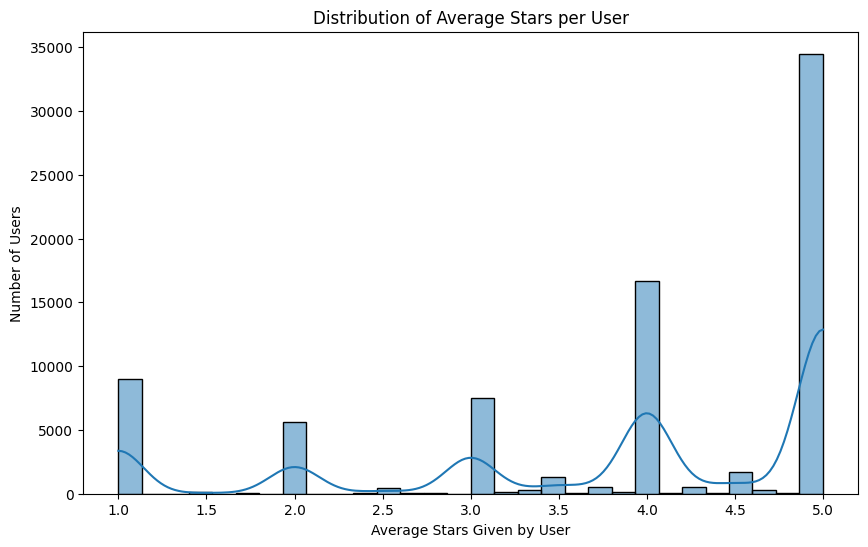

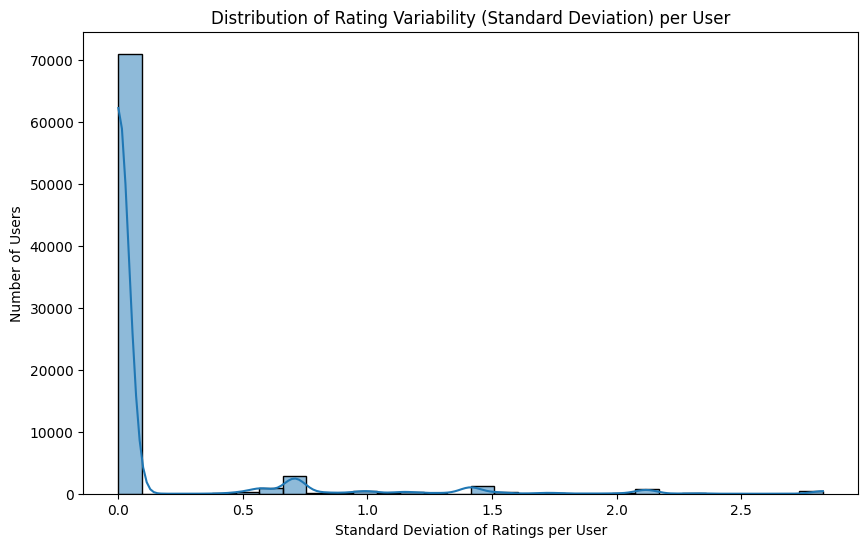

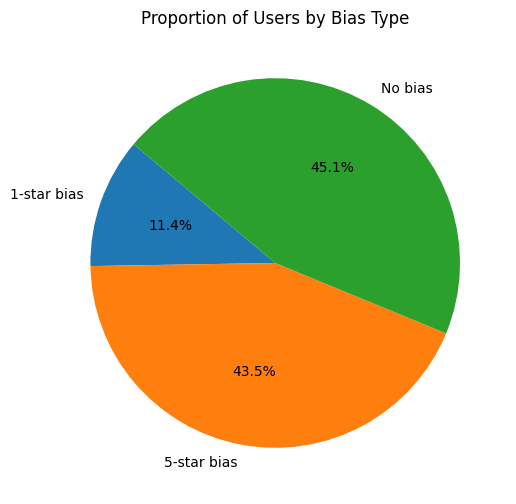

จำนวนผู้ใช้ทั้งหมด: 79345
ผู้ใช้ที่มีแนวโน้ม 1-star bias: 9027 (11.38%)
ผู้ใช้ที่มีแนวโน้ม 5-star bias: 34526 (43.51%)
ผู้ใช้ที่ไม่มี bias: 35792 (45.11%)

ค่าเฉลี่ยของส่วนเบี่ยงเบนมาตรฐานของคะแนนผู้ใช้ทั้งหมด: 0.121


In [ ]:
# 1. สรุปสถิติของการให้คะแนนต่อผู้ใช้
user_bias = df.groupby('user_id')['stars_review'].agg(['mean', 'std', 'count']).reset_index()
user_bias.columns = ['user_id', 'avg_stars', 'std_stars', 'review_count']

# แทนค่า NaN ใน std (กรณีให้คะแนนเท่ากันหมด)
user_bias['std_stars'] = user_bias['std_stars'].fillna(0)

# 2. ตรวจสอบสัดส่วนของ 1 ดาว และ 5 ดาว
bias_ratios = df.groupby('user_id')['stars_review'].apply(lambda x: pd.Series({
    'ratio_1star': (x == 1).sum() / len(x),
    'ratio_5star': (x == 5).sum() / len(x)
})).reset_index()

bias_ratios_pivoted = bias_ratios.pivot(index='user_id', columns='level_1', values='stars_review').reset_index()
bias_ratios_pivoted.columns.name = None # Remove the columns name after pivot

user_bias = user_bias.merge(bias_ratios_pivoted, on='user_id', how='left')

# 3. ตั้งเงื่อนไข Bias (>= 80%)
bias_threshold = 0.8
user_bias['is_1star_bias'] = user_bias['ratio_1star'] >= bias_threshold
user_bias['is_5star_bias'] = user_bias['ratio_5star'] >= bias_threshold

# 4. แสดงผลผู้ใช้ที่มีแนวโน้ม bias
biased_1star = user_bias[user_bias['is_1star_bias'] & (user_bias['review_count'] > 3)]
biased_5star = user_bias[user_bias['is_5star_bias'] & (user_bias['review_count'] > 3)]

print("จำนวนผู้ใช้ที่มีแนวโน้ม 1-star bias:", len(biased_1star))
print("จำนวนผู้ใช้ที่มีแนวโน้ม 5-star bias:", len(biased_5star))
print("\nตัวอย่างผู้ใช้ที่อาจมี 1-star bias:")
display(biased_1star.sort_values(by='review_count', ascending=False).head(10))
print("\nตัวอย่างผู้ใช้ที่อาจมี 5-star bias:")
display(biased_5star.sort_values(by='review_count', ascending=False).head(10))

# 5. การกระจายคะแนนเฉลี่ยและความแปรปรวนของแต่ละผู้ใช้
plt.figure(figsize=(10, 6))
sns.histplot(user_bias['avg_stars'], bins=30, kde=True)
plt.title("Distribution of Average Stars per User")
plt.xlabel("Average Stars Given by User")
plt.ylabel("Number of Users")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(user_bias['std_stars'], bins=30, kde=True)
plt.title("Distribution of Rating Variability (Standard Deviation) per User")
plt.xlabel("Standard Deviation of Ratings per User")
plt.ylabel("Number of Users")
plt.show()

# 6. Visualization: สัดส่วนผู้ใช้ที่มี Bias
bias_summary = {
    '1-star bias': user_bias['is_1star_bias'].sum() if 'is_1star_bias' in user_bias.columns else 0,
    '5-star bias': user_bias['is_5star_bias'].sum() if 'is_5star_bias' in user_bias.columns else 0,
    'No bias': len(user_bias) - (user_bias['is_1star_bias'].sum() + user_bias['is_5star_bias'].sum()) if ('is_1star_bias' in user_bias.columns and 'is_5star_bias' in user_bias.columns) else len(user_bias)
}

plt.figure(figsize=(7, 6))
plt.pie(bias_summary.values(), labels=bias_summary.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Users by Bias Type")
plt.show()

print("จำนวนผู้ใช้ทั้งหมด:", len(user_bias))
print(f"ผู้ใช้ที่มีแนวโน้ม 1-star bias: {user_bias['is_1star_bias'].sum()} "
      f"({(user_bias['is_1star_bias'].mean()*100):.2f}%)")
print(f"ผู้ใช้ที่มีแนวโน้ม 5-star bias: {user_bias['is_5star_bias'].sum()} "
      f"({(user_bias['is_5star_bias'].mean()*100):.2f}%)")
print(f"ผู้ใช้ที่ไม่มี bias: {bias_summary['No bias']} "
      f"({bias_summary['No bias']/len(user_bias)*100:.2f}%)")
print("\nค่าเฉลี่ยของส่วนเบี่ยงเบนมาตรฐานของคะแนนผู้ใช้ทั้งหมด:",
      round(user_bias['std_stars'].mean(), 3))

จากผลการวิเคราะห์ พบว่า ผู้ใช้ใน Yelp dataset มีแนวโน้ม เอนเอียงเชิงบวกมากกว่าลบ โดยเกือบครึ่งหนึ่งของผู้ใช้มีพฤติกรรม ให้คะแนนรีวิว 5 ดาวเป็นส่วนใหญ่

ขณะที่ผู้ใช้ที่มีแนวโน้มวิจารณ์เชิงลบมีเพียงหนึ่งในสิบ สิ่งนี้สะท้อนว่าระบบรีวิวออนไลน์มักมี positive bias


#### 2. ความแตกต่างของลักษณะการรีวิว (moderate vs extreme) ในแต่ละประเภทธุรกิจบ่งบอกถึงรูปแบบประสบการณ์ของลูกค้าอย่างไร?

วัตถุประสงค์: เพื่อศึกษา sentiment analysis

🌟 ธุรกิจ Extreme (Top 3 โดย Standard Deviation):


,name_review_business,std_stars,avg_stars,count_reviews
8737,Blake's Lotaburger,1.689369,3.055556,36
263,Giordano's,1.660898,3.162791,43
9857,Suegra Tequila Cantina,1.653603,3.588235,34



✅ ธุรกิจ Moderate (Top 3 โดย Standard Deviation):


,name_review_business,std_stars,avg_stars,count_reviews
8594,Trend Eye Care,0.0,5.0,30
2849,Wine Edventures,0.0,5.0,40
343,Jump On The School Bus,0.0,5.0,35


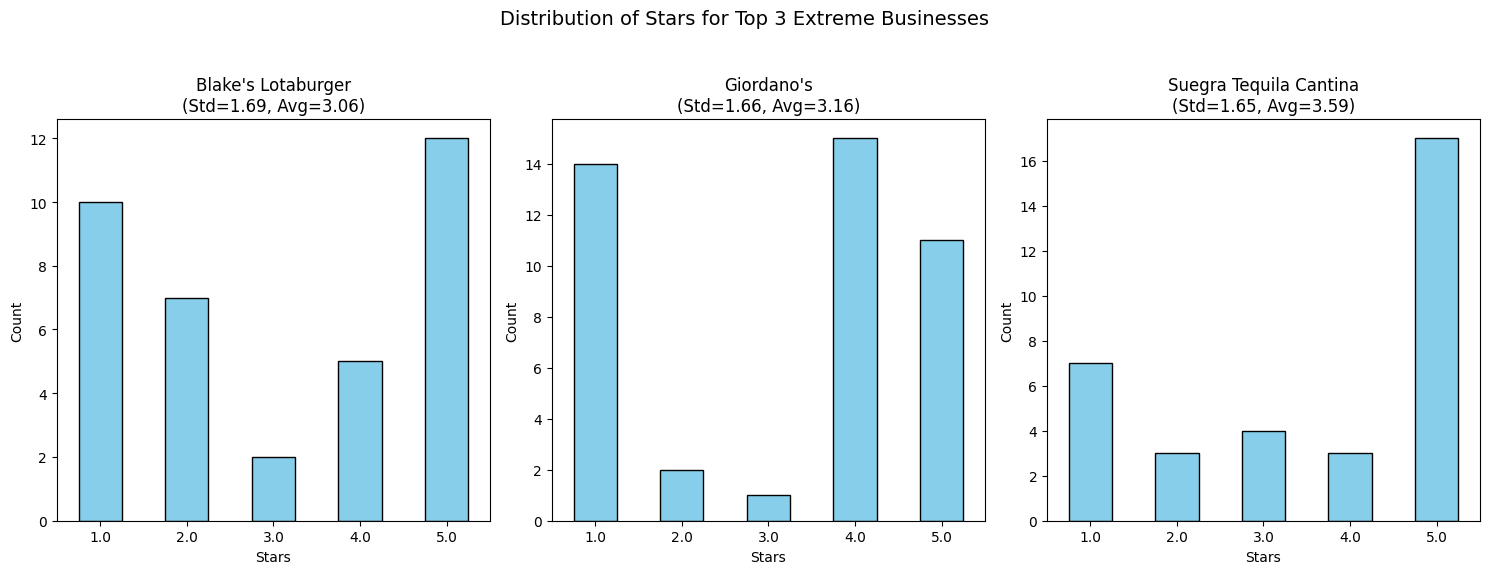

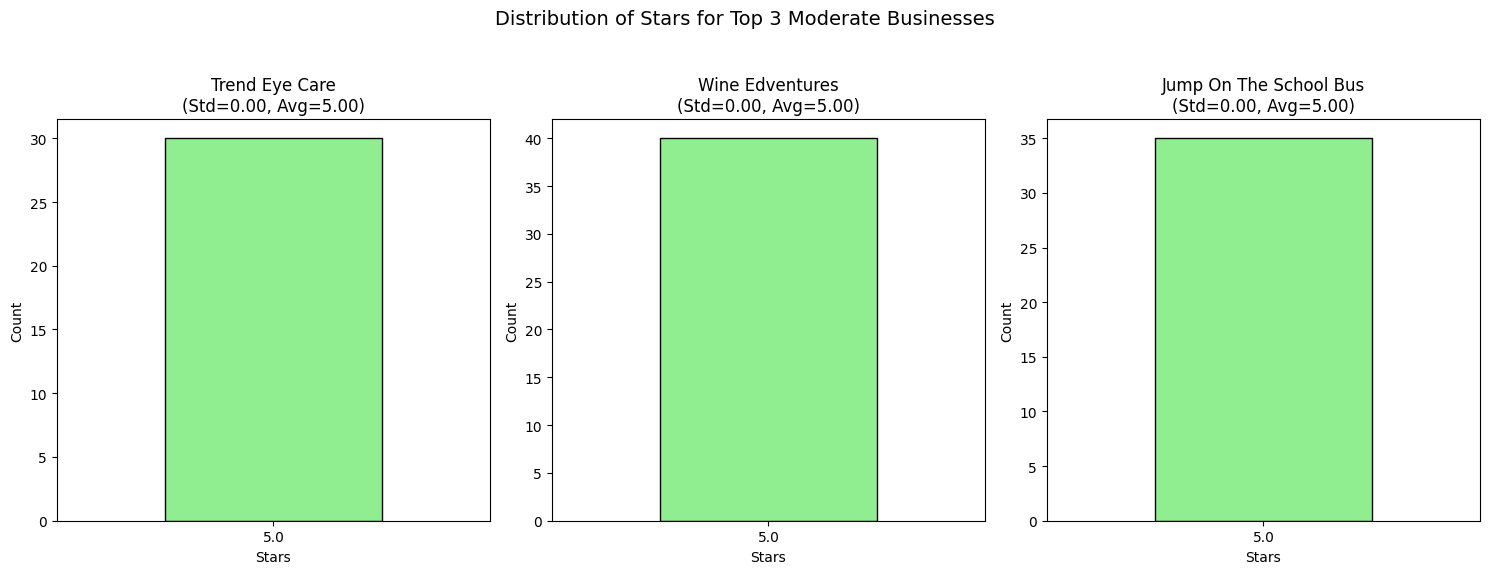

In [ ]:
# คำนวณสถิติรีวิวต่อธุรกิจ
review_stats = df.groupby(['business_id', 'name_review_business', 'categories']).agg(
    avg_stars=('stars_review', 'mean'),
    std_stars=('stars_review', 'std'),
    count_reviews=('stars_review', 'count')
).reset_index()

# ธุรกิจที่มีรีวิว >= 30
review_stats = review_stats[review_stats['count_reviews'] >= 30]

# เลือกธุรกิจ extreme (std สูงสุด 3 อันดับแรก) และ moderate (std ต่ำสุด 3 อันดับแรก)
extreme_businesses_top3 = review_stats.sort_values('std_stars', ascending=False).head(3)
moderate_businesses_top3 = review_stats.sort_values('std_stars', ascending=True).head(3)

print("🌟 ธุรกิจ Extreme (Top 3 โดย Standard Deviation):")
display(extreme_businesses_top3[['name_review_business', 'std_stars', 'avg_stars','count_reviews']])
print("\n✅ ธุรกิจ Moderate (Top 3 โดย Standard Deviation):")
display(moderate_businesses_top3[['name_review_business', 'std_stars', 'avg_stars','count_reviews']])

#Plot Bar Chart สำหรับ Top 3 ธุรกิจ Extreme
plt.figure(figsize=(15, 6))
plt.suptitle("Distribution of Stars for Top 3 Extreme Businesses", fontsize=14)

for i, row in enumerate(extreme_businesses_top3.itertuples()):
    business_id = row.business_id
    business_name = row.name_review_business
    std_dev = row.std_stars
    avg_stars = row.avg_stars

    extreme_reviews = df[df['business_id'] == business_id]['stars_review']
    extreme_star_counts = extreme_reviews.value_counts().sort_index()

    plt.subplot(1, 3, i + 1)
    extreme_star_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=plt.gca())
    plt.title(f"{business_name}\n(Std={std_dev:.2f}, Avg={avg_stars:.2f})")
    plt.xlabel("Stars")
    plt.ylabel("Count")
    plt.xticks(rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

#Plot Bar Chart สำหรับ Top 3 ธุรกิจ Moderate
plt.figure(figsize=(15, 6))
plt.suptitle("Distribution of Stars for Top 3 Moderate Businesses", fontsize=14)

for i, row in enumerate(moderate_businesses_top3.itertuples()):
    business_id = row.business_id
    business_name = row.name_review_business
    std_dev = row.std_stars
    avg_stars = row.avg_stars

    moderate_reviews = df[df['business_id'] == business_id]['stars_review']
    moderate_star_counts = moderate_reviews.value_counts().sort_index()

    plt.subplot(1, 3, i + 1)
    moderate_star_counts.plot(kind='bar', color='lightgreen', edgecolor='black', ax=plt.gca())
    plt.title(f"{business_name}\n(Std={std_dev:.2f}, Avg={avg_stars:.2f})")
    plt.xlabel("Stars")
    plt.ylabel("Count")
    plt.xticks(rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

เราแยกประเภทธุรกิจแบบ extreme กับ moderate ได้จาก ค่า Std ของคะแนนรีวิว
*   Extreme Businesses จะมีค่าStd สูง
*   Moderate Businesses จะมีค่าStd ต่ำ

จะเห็นได้ว่าธุรกิจแบบExtreme จะมีการให้คะแนนรีวิวสูงจำนวนมาก และคะแนนรีวิวต่ำเป็นจำนวนเช่นกัน

เราจึงสนใจที่จะตีความหมายต่อว่า เหตุใดจึงเป็นเช่นนั้น


เราเลือกร้าน Blake's Lotaburger ที่อยู่ในธุรกิจแบบExtreme

In [ ]:
blakes_lotaburger_id = extreme_businesses_top3[extreme_businesses_top3['name_review_business'] == "Blake's Lotaburger"]['business_id'].iloc[0]
blakes_lotaburger_reviews = df[df['business_id'] == blakes_lotaburger_id]

star_rating_counts = blakes_lotaburger_reviews['stars_review'].value_counts().sort_index()

print("Star Rating Distribution for Blake's Lotaburger:")
display(star_rating_counts)

if 5.0 in star_rating_counts:
    print(f"\nNumber of 5-star reviews: {star_rating_counts[5.0]}")
else:
    print("\nNumber of 5-star reviews: 0")

if 1.0 in star_rating_counts:
    print(f"Number of 1-star reviews: {star_rating_counts[1.0]}")
else:
    print("Number of 1-star reviews: 0")

Star Rating Distribution for Blake's Lotaburger:


,count
stars_review,
1.0,10
2.0,7
3.0,2
4.0,5
5.0,12



Number of 5-star reviews: 12
Number of 1-star reviews: 10


เราทำการกำจัด stop word ก่อนจะวิเคราะห์ sentiment analysis

แต่ยังคงคำ negation ที่เราจะเก็บไว้ ได้แก่
negations = {"not", "no", "nor", "never"}

เนื่องจากอาจมีผลต่อการวิเคราะห์ได้

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
negations = {"not", "no", "nor", "never"}
custom_stopwords = stop_words - negations

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text, mode="lemma"):
    """
    mode: "lemma" = ใช้ Lemmatization,
          "stem" = ใช้ Stemming,
          "both" = ใช้ทั้งสองแบบต่อเนื่อง
    """
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = text.split()
    tokens = [w for w in tokens if w not in custom_stopwords]

    if mode == "lemma":
        tokens = [lemmatizer.lemmatize(w) for w in tokens]
    elif mode == "stem":
        tokens = [stemmer.stem(w) for w in tokens]
    elif mode == "both":
        tokens = [stemmer.stem(lemmatizer.lemmatize(w)) for w in tokens]

    return " ".join(tokens)

In [ ]:
for index, row in blakes_lotaburger_reviews.iterrows():
    review_text = row['text']
    if 'sentiment_label' in blakes_lotaburger_reviews.columns:
        sentiment = row['sentiment_label']
        print(f"Review: {review_text} → Sentiment: {sentiment}")
    else:
        print(f"Review: {review_text}")

Review: I had the bacon burrito. It was very good size burrito for 4$. It did not have much bacon ,but the green sauce was very good. I would recommend this restaurant.
Review: We were greeted when we stepped through the door.  We ordered our food.  As we were watching the employees, I was blown away by how slow they moved.  I was really surprised because they were busy!  Not one of them had any hustle to them.  Some guy was sweeping the kitchen floor as the other staff were doing food prep?  The burgers were ok.  I've had better at Smashburger.  The price at Blake's was about right for the quality of the food.  The parking lot is so small, I'm surprised there wasn't an accident!
Review: Well my daughter and I figured we'd try the new place on Speedway before the one opens up on our side of town on Valencia.   Let me say the burgers looked like Whataburger but that is where it ends.  I get the name now Lotaburger, must come from the Bible as to Lot's wife because the burgers we had tas

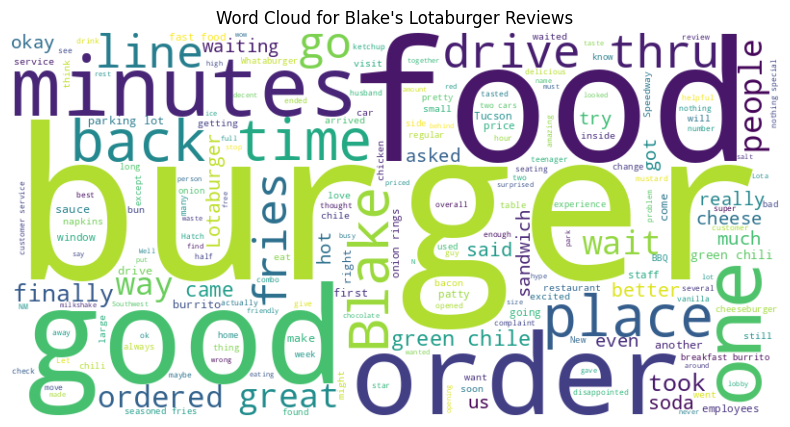

In [ ]:
blakes_lotaburger_id = extreme_businesses_top3[extreme_businesses_top3['name_review_business'] == "Blake's Lotaburger"]['business_id'].iloc[0]
blakes_lotaburger_reviews = df[df['business_id'] == blakes_lotaburger_id]
text = " ".join(blakes_lotaburger_reviews['text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Blake's Lotaburger Reviews")
plt.show()

มีคะแนน 5 ดาว จำนวน 12 คน 1ดาว จำนวน 10 คน ซึ่งเป็นจำนวนที่ไม่แตกต่างกันมาก

เราจึงนำรีวิวในร้านนี้มาทำ word cloud เพื่อดูว่าลูกค้าให้ความคิดเห็นร้านเป็นอย่างไร

In [ ]:
try:
    SentimentIntensityAnalyzer()
except LookupError:
    nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

blakes_lotaburger_reviews.loc[:, 'sentiment'] = blakes_lotaburger_reviews['text'].apply(get_sentiment_scores)
blakes_lotaburger_reviews.loc[:, 'compound_sentiment'] = blakes_lotaburger_reviews['sentiment'].apply(lambda x: x['compound'])

# Classify sentiment based on compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

blakes_lotaburger_reviews.loc[:, 'sentiment_label'] = blakes_lotaburger_reviews['compound_sentiment'].apply(classify_sentiment)

print("Reviews with Sentiment Labels (first 5 rows):")
display(blakes_lotaburger_reviews[['text', 'stars_review', 'sentiment_label', 'compound_sentiment']].head())

print("\nSentiment Distribution:")
display(blakes_lotaburger_reviews['sentiment_label'].value_counts())

Reviews with Sentiment Labels (first 5 rows):


/tmp/ipython-input-2644800650.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blakes_lotaburger_reviews.loc[:, 'sentiment'] = blakes_lotaburger_reviews['text'].apply(get_sentiment_scores)
/tmp/ipython-input-2644800650.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blakes_lotaburger_reviews.loc[:, 'compound_sentiment'] = blakes_lotaburger_reviews['sentiment'].apply(lambda x: x['compound'])
/tmp/ipython-input-2644800650.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,text,stars_review,sentiment_label,compound_sentiment
3996,I had the bacon burrito. It was very good size...,4.0,Positive,0.8759
4018,We were greeted when we stepped through the do...,2.0,Positive,0.9140
8755,Well my daughter and I figured we'd try the ne...,1.0,Positive,0.6249
15909,I made my first visit to Blake's yesterday. I ...,4.0,Positive,0.9620
16728,I just moved to Tucson and found Lota Burger o...,5.0,Positive,0.8344



Sentiment Distribution:


,count
sentiment_label,
Positive,25
Negative,9
Neutral,2


Top 10 Words in Positive Reviews:


,Word,Frequency
0,burger,24
1,green,23
2,food,23
3,get,19
4,good,18
5,fries,17
6,blakes,15
7,one,13
8,great,13
9,place,12



Top 10 Words in Negative Reviews:


,Word,Frequency
0,food,21
1,minutes,15
2,line,12
3,drive,12
4,thru,12
5,go,9
6,time,9
7,wait,9
8,place,7
9,better,7


/tmp/ipython-input-3472451089.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=pd.DataFrame(top_positive_words, columns=['Word', 'Frequency']), palette='Blues_d')
/tmp/ipython-input-3472451089.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=pd.DataFrame(top_negative_words, columns=['Word', 'Frequency']), palette='Reds_d')


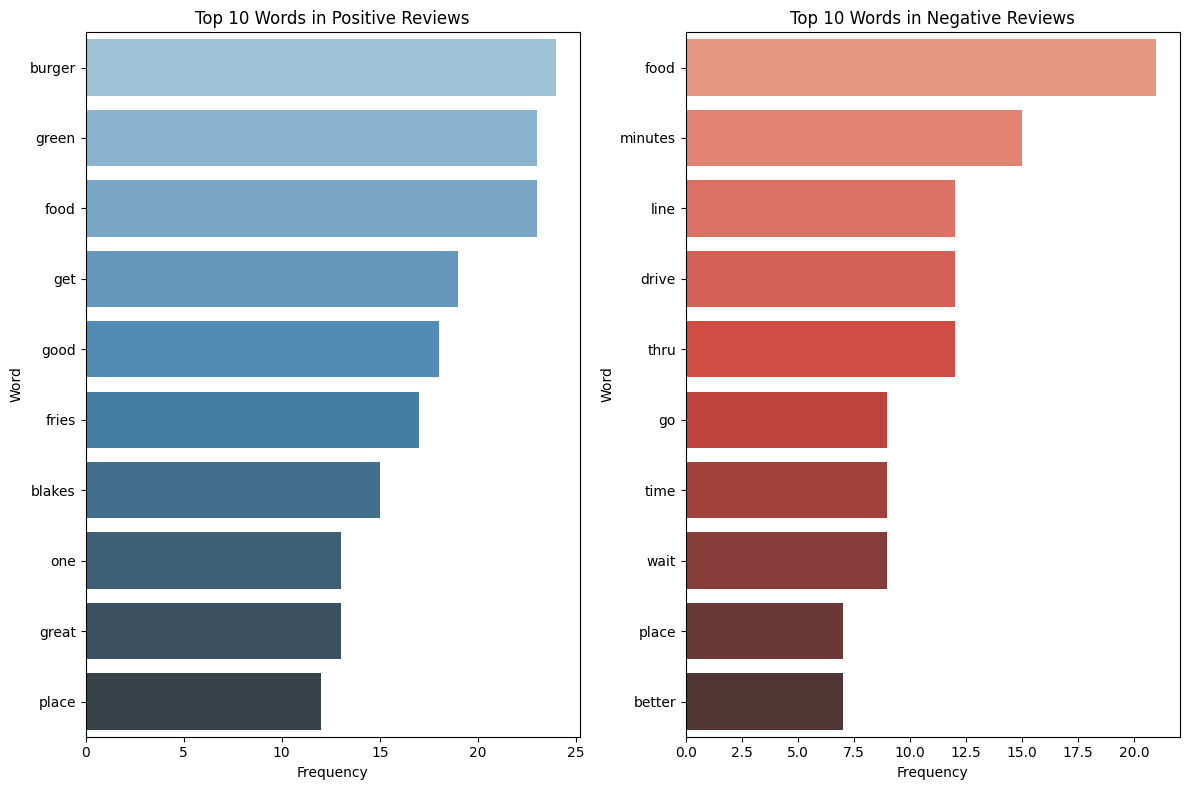

In [ ]:
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokens = [word for word in text.split() if word not in stop_words and len(word) > 1] # Remove single characters too
    return tokens

# Filter reviews based on sentiment label
positive_reviews = blakes_lotaburger_reviews[blakes_lotaburger_reviews['sentiment_label'] == 'Positive']['text']
negative_reviews = blakes_lotaburger_reviews[blakes_lotaburger_reviews['sentiment_label'] == 'Negative']['text']

# Combine text and get word counts for each sentiment group
positive_text = " ".join(positive_reviews.astype(str))
negative_text = " ".join(negative_reviews.astype(str))

positive_tokens = clean_and_tokenize(positive_text)
negative_tokens = clean_and_tokenize(negative_text)

positive_word_counts = Counter(positive_tokens)
negative_word_counts = Counter(negative_tokens)

# Get top N words
top_n = 10
top_positive_words = positive_word_counts.most_common(top_n)
top_negative_words = negative_word_counts.most_common(top_n)

print(f"Top {top_n} Words in Positive Reviews:")
display(pd.DataFrame(top_positive_words, columns=['Word', 'Frequency']))

print(f"\nTop {top_n} Words in Negative Reviews:")
display(pd.DataFrame(top_negative_words, columns=['Word', 'Frequency']))

# Optional: Visualize the top words
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=pd.DataFrame(top_positive_words, columns=['Word', 'Frequency']), palette='Blues_d')
plt.title(f'Top {top_n} Words in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=pd.DataFrame(top_negative_words, columns=['Word', 'Frequency']), palette='Reds_d')
plt.title(f'Top {top_n} Words in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.tight_layout()
plt.show()

ทำการค้นหาคำที่พบมากที่สุดในคอมเม้นที่เป็น positive และ negative 10อันดับแรก

จะพบว่าในฝั่ง positive จะมีคำว่า
* burger
* green
* food
อาจหมายถึงว่า เบอร์เกอร์ของร้านนี้มีความอร่อย

ในฝั่ง negative จะพบ
* food
* minutes
* line
อาจเป็นไปได้ว่า เวลาในการรออาหารนั้นนาน หรือแถวรอมีความยาว

ซึ่งอาจจะยังไม่ชัดเจนมาก เราจึงทำการวิเคราะห์ 2 diagram เพิ่ม





Most Frequent Bigrams in Blake's Lotaburger Reviews:
               Bigram  Frequency
0         green chili         19
1          drive thru         14
2         parking lot          8
3         onion rings          7
4           fast food          6
5            get food          6
6          15 minutes          5
7        waiting food          5
8      seasoned fries          5
9    customer service          4
10         10 minutes          4
11           two cars          4
12         going back          4
13        looked like          3
14        first visit          3
15          chili hot          3
16        minutes one          3
17        opening day          3
18            go back          3
19  breakfast burrito          3


/tmp/ipython-input-2719148091.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


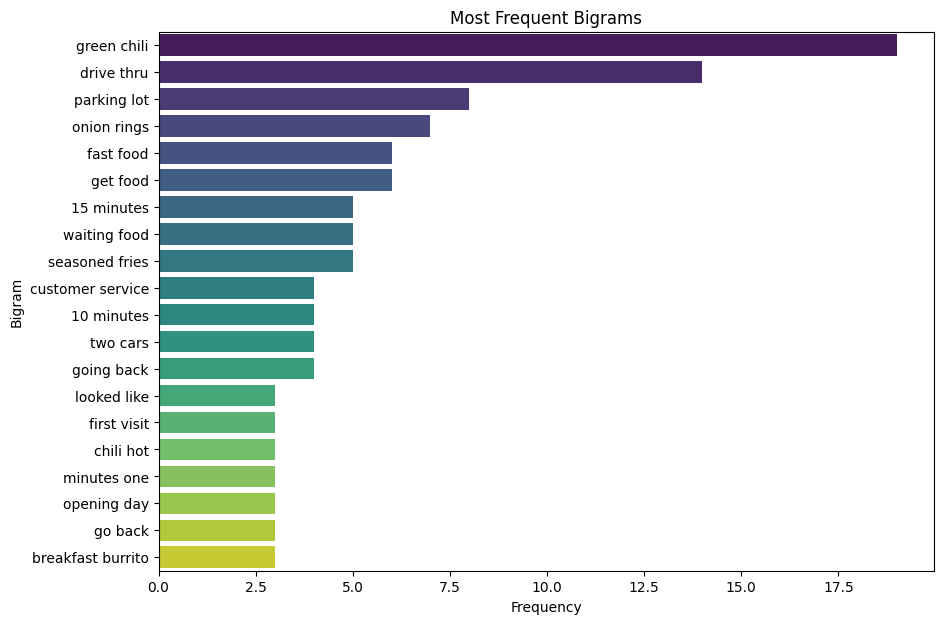

In [ ]:
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

stop_words = set(stopwords.words('english'))

SYNONYM_MAP = {
    "chile": "chili",
    "chiles": "chili"
}

def clean_and_tokenize(text):
    # Remove punctuation & lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Replace synonyms if any
    tokens = [SYNONYM_MAP.get(word, word) for word in tokens]

    # Remove stopwords & single characters
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return tokens

all_reviews_text = " ".join(blakes_lotaburger_reviews['text'].astype(str))
all_tokens = clean_and_tokenize(all_reviews_text)

bigram_finder = BigramCollocationFinder.from_words(all_tokens)

bigram_finder.apply_freq_filter(3)

most_common_bigrams = bigram_finder.ngram_fd.most_common(20)

# แสดงผลในตาราง
bigram_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])
bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))  # Convert tuple → string
print("Most Frequent Bigrams in Blake's Lotaburger Reviews:")
print(bigram_df)

if not bigram_df.empty:
    plt.figure(figsize=(10, 7))
    sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')
    plt.title("Most Frequent Bigrams")
    plt.xlabel("Frequency")
    plt.ylabel("Bigram")
    plt.show()
else:
    print("No bigrams found with the specified frequency filter.")

/tmp/ipython-input-957596431.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=df_positive, ax=axes[0], palette='Blues_d')
/tmp/ipython-input-957596431.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=df_negative, ax=axes[1], palette='Reds_d')


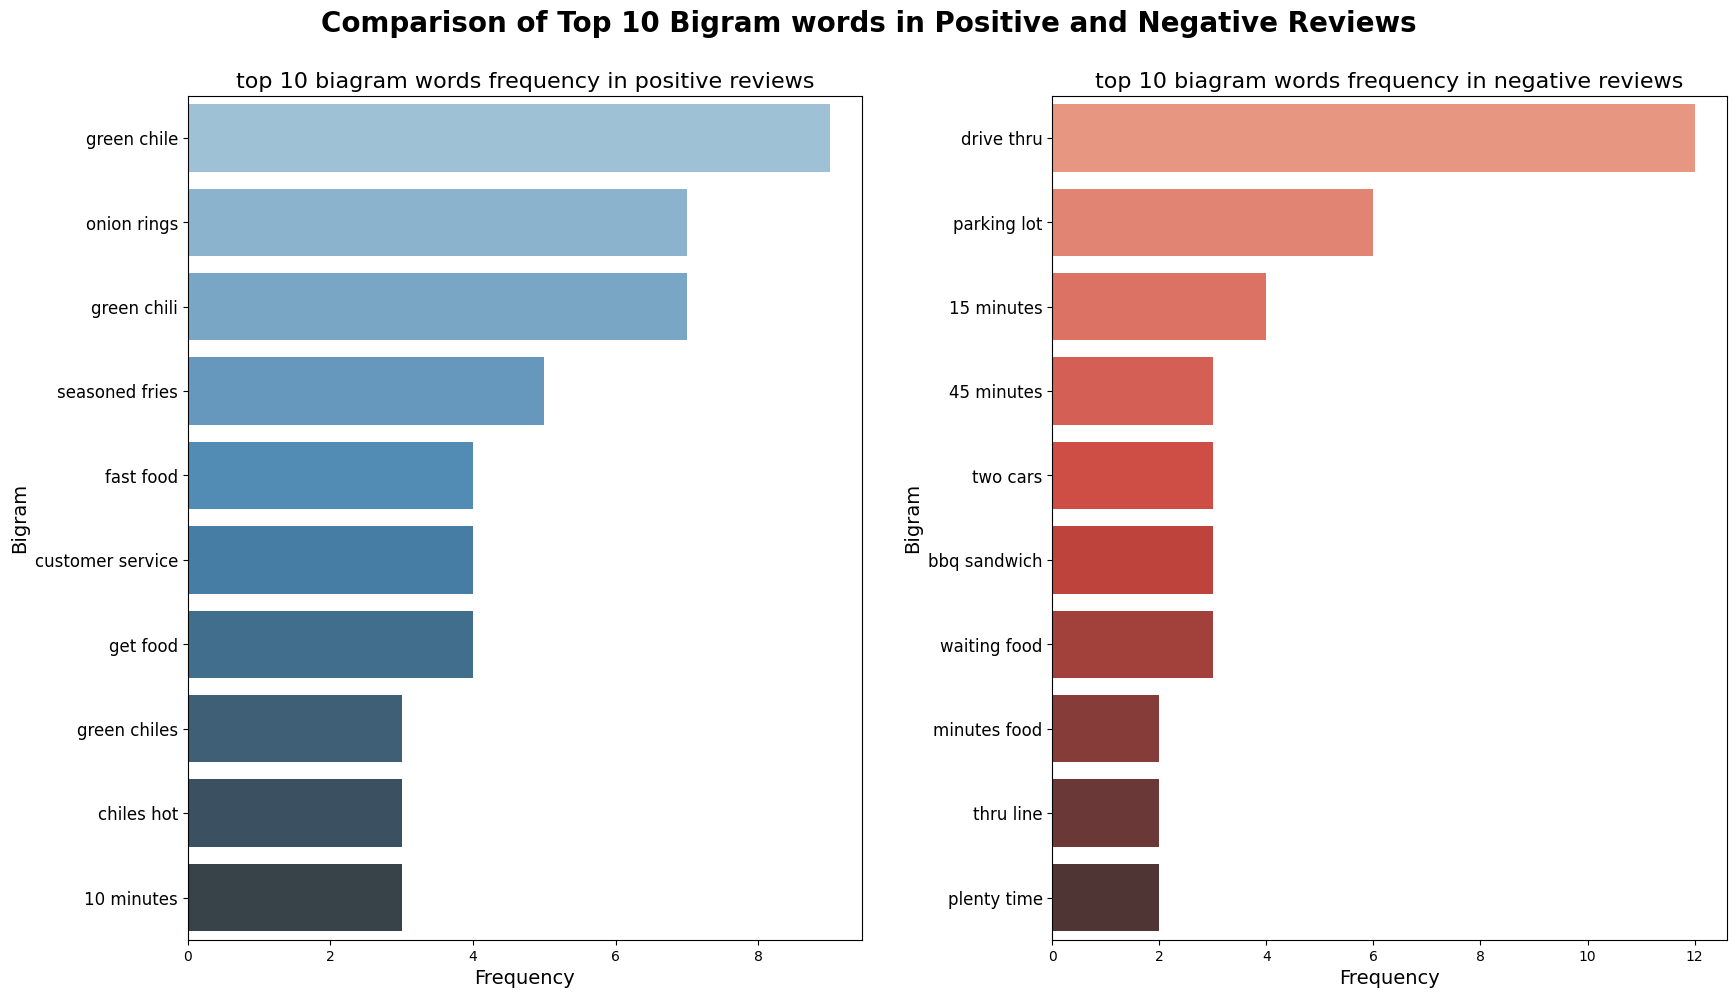

สร้างกราฟเปรียบเทียบ Bigram ในรีวิวเชิงบวกและเชิงลบเสร็จสมบูรณ์


In [ ]:
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt/english.pickle')
except LookupError:
    nltk.download('punkt')

SYNONYM_MAP = {
    "chile": "chili",
    "chiles": "chili"
}

stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return tokens

positive_reviews = blakes_lotaburger_reviews[blakes_lotaburger_reviews['sentiment_label'] == 'Positive']['text']
negative_reviews = blakes_lotaburger_reviews[blakes_lotaburger_reviews['sentiment_label'] == 'Negative']['text']

positive_text = " ".join(positive_reviews.astype(str))
positive_tokens = clean_and_tokenize(positive_text)
positive_bigram_finder = BigramCollocationFinder.from_words(positive_tokens)

top_positive_bigrams = positive_bigram_finder.ngram_fd.most_common(10)

negative_text = " ".join(negative_reviews.astype(str))
negative_tokens = clean_and_tokenize(negative_text)
negative_bigram_finder = BigramCollocationFinder.from_words(negative_tokens)

top_negative_bigrams = negative_bigram_finder.ngram_fd.most_common(10)


# สร้าง DataFrame
df_positive = pd.DataFrame([(f"{b[0]} {b[1]}", freq) for b, freq in top_positive_bigrams], columns=['Bigram', 'Frequency'])
df_negative = pd.DataFrame([(f"{b[0]} {b[1]}", freq) for b, freq in top_negative_bigrams], columns=['Bigram', 'Frequency'])

# สร้างกราฟ Bar Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.barplot(x='Frequency', y='Bigram', data=df_positive, ax=axes[0], palette='Blues_d')
axes[0].set_title('top 10 biagram words frequency in positive reviews', fontsize=16)
axes[0].set_xlabel('Frequency', fontsize=14)
axes[0].set_ylabel('Bigram', fontsize=14)
axes[0].tick_params(axis='y', labelsize=12)
sns.barplot(x='Frequency', y='Bigram', data=df_negative, ax=axes[1], palette='Reds_d')
axes[1].set_title('top 10 biagram words frequency in negative reviews', fontsize=16)
axes[1].set_xlabel('Frequency', fontsize=14)
axes[1].set_ylabel('Bigram', fontsize=14)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout(pad=3.0)
plt.suptitle('Comparison of Top 10 Bigram words in Positive and Negative Reviews', fontsize=20, y=1.02, fontweight='bold')
plt.show()

print("สร้างกราฟเปรียบเทียบ Bigram ในรีวิวเชิงบวกและเชิงลบเสร็จสมบูรณ์")

จากการวิเคราะห์ bigram และนำมาแบ่งเป็นคำที่พบบ่อยใน positive และ negative

คำที่พบใน positive เช่น
* green chile
* onion rings
* seasoned fries

อาจแปลได้ว่ามีความอร่อย และได้รับความนิยมมาก

คำที่พบใน negative เช่น
* drive thru
* parking lot
* 15 minutes

อาจแปลได้ว่า มีที่จอดรถน้อย และใช้เวลาในการรอคิวนาน

หากเพิ่มเติมจากก่อนหน้านี้อาจะแปลได้ว่า แถว drive thru มีความนานได้ด้วย

## Problem 3: Retrieving Data from Internet

ให้แต่ละกลุ่มคิดหัวข้อที่สนใจ และทำการดึงข้อมูลเกี่ยวกับหัวข้อที่สนใจผ่าน url ด้วยฟังก์ชัน `urllib.request.urlopen` จากแหล่งข้อมูลออนไลน์อย่างน้อย 10 แห่ง รวบรวมข้อมูลให้เป็นหนึ่งเดียว

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -P /content/

In [ ]:
!pip install pythainlp nltk beautifulsoup4

In [ ]:
!ls /content/

drive			     thsarabunnew-webfont.ttf.17
sample_data		     thsarabunnew-webfont.ttf.18
thsarabunnew-webfont.ttf     thsarabunnew-webfont.ttf.2
thsarabunnew-webfont.ttf.1   thsarabunnew-webfont.ttf.3
thsarabunnew-webfont.ttf.10  thsarabunnew-webfont.ttf.4
thsarabunnew-webfont.ttf.11  thsarabunnew-webfont.ttf.5
thsarabunnew-webfont.ttf.12  thsarabunnew-webfont.ttf.6
thsarabunnew-webfont.ttf.13  thsarabunnew-webfont.ttf.7
thsarabunnew-webfont.ttf.14  thsarabunnew-webfont.ttf.8
thsarabunnew-webfont.ttf.15  thsarabunnew-webfont.ttf.9
thsarabunnew-webfont.ttf.16


In [ ]:
!pip install pythainlp

In [ ]:
urls = [
"https://food.trueid.net/detail/m78aPqa4d4qr",
"https://www.onesiam.com/th/feast/top-100-best-restaurants-at-onesiam",
"https://www.grab.com/th/food-blog/",
"https://th.airportels.asia/thailand-travel/20-restaurants-in-siam-center/",
"https://food.trueid.net/detail/4X3Bj4e0k8QL",
"https://food.trueid.net/detail/kb4rvrrR7GVn",
"https://pantip.com/topic/42417542",
"https://www.facebook.com/Misasaki.in.wonderland/posts/",
"https://www.siamcenter.co.th/trendupdate/Aug2022-Checklist/448",
"https://www.lemon8-app.com/topic/7062773677259177986?region=th",
]

In [ ]:
all_fetched_text = ""
for url in urls:
    try:
        response = requests.get(url)
        response.raise_for_status()
        html_content = response.text
        all_fetched_text += html_content + "\n\n"
        print(f"Successfully fetched content from {url}")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching content from {url}: {e}")

print("\nFirst 500 characters of combined fetched text:")
print(all_fetched_text[:500])

Successfully fetched content from https://food.trueid.net/detail/m78aPqa4d4qr
Successfully fetched content from https://www.onesiam.com/th/feast/top-100-best-restaurants-at-onesiam
Successfully fetched content from https://www.grab.com/th/food-blog/
Successfully fetched content from https://th.airportels.asia/thailand-travel/20-restaurants-in-siam-center/
Successfully fetched content from https://food.trueid.net/detail/4X3Bj4e0k8QL
Successfully fetched content from https://food.trueid.net/detail/kb4rvrrR7GVn
Successfully fetched content from https://pantip.com/topic/42417542
Successfully fetched content from https://www.facebook.com/Misasaki.in.wonderland/posts/
Successfully fetched content from https://www.siamcenter.co.th/trendupdate/Aug2022-Checklist/448
Successfully fetched content from https://www.lemon8-app.com/topic/7062773677259177986?region=th

First 500 characters of combined fetched text:
<!DOCTYPE html><html lang="th"><head><script type="text/javascript" src="https://fn.dmp

###เตรียมข้อมูลและทำความสะอาดข้อมูล
ด้วยการทำ lower case, tokenization, removing stopwords (as well as punctuations, unrelated symbols, etc.), stemming, lemmatization เป็นต้น

In [ ]:
# 1. นิยามฟังก์ชันและพจนานุกรมต้องถูกรันก่อนเสมอ
SYNONYM_MAP = {
    "grabfood": "grab",
    "แกร็บฟู้ด": "grab",
    "แกร็บ": "grab",
    "แก๊ป": "grab",
    "ทาน": "กิน",
    "siam": "สยาม"
}

def normalize_tokens(tokens, synonym_map):
    normalized = [synonym_map.get(token, token) for token in tokens]
    return normalized

def clean_text(text):
    if text is None: return ""
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+', '', text)
    text = re.sub(r'\#\w+', '', text)
    soup = BeautifulSoup(text, "html.parser")
    for script in soup(["script", "style"]):
        script.decompose()
    text = soup.get_text()
    text = re.sub(r"[^ก-๙a-zA-Z\s]", " ", text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

if 'all_fetched_text' in locals():
    cleaned_text = clean_text(text=all_fetched_text)

    # 2. Tokenization
    tokens = word_tokenize(cleaned_text, keep_whitespace=False)

    # 3. Normalization (เรียกใช้ฟังก์ชันที่สร้างไว้ด้านบน)
    tokens = normalize_tokens(tokens, SYNONYM_MAP)

    # 4. Remove Stopwords
    thai_stop = set(thai_stopwords())
    english_stop = set(nltk_stopwords.words('english'))
    custom_stopwords = {"ยอดนิยม", "ร้าน", "ที่เที่ยว", "เที่ยว", "ของ", "ที่", "และ", "ใน", "ได้", "มี", "เป็น", "กับ", "การ", "สำหรับ", "จาก", "ให้", "มา", "ว่า", "จะ", "ไป", "นี้", "ก็", "ยัง", "ให้", "กี","แล้ว", "ครับ", "ค่ะ", "เลย", "ด้วย", "อย่าง", "เช่น", "ต้อง", "สามารถ", "เรา", "คุณ"}
    technical_words_to_remove = {"blog", "html", "document", "function","var"}
    all_stopwords = thai_stop.union(english_stop).union(custom_stopwords).union(technical_words_to_remove)

    filtered_tokens = [word for word in tokens if word not in all_stopwords and word.strip() != "" and len(word) > 1]

    print("Tokens after all processing:")
    print(filtered_tokens[:50])
    print("-" * 50)
    print(f"Total filtered tokens: {len(filtered_tokens):,d}")

else:
    print("Error: 'all_fetched_text' variable not found. Please run the cell to fetch text first.")
    filtered_tokens = []

Tokens after all processing:
['ชี้', 'เป้า', 'ร้านอาหาร', 'สยาม', 'ราคา', 'อัพเดท', 'อร่อย', 'งบ', 'บาท', 'food', 'listitem', 'position', 'item', 'ร้านอาหาร', 'สยาม', 'ราคา', 'อัพเดท', 'อร่อย', 'งบ', 'บาท', 'toggle', 'navigation', 'access', 'extraordinary', 'สยาม', 'paragon', 'สยาม', 'center', 'สยาม', 'discovery', 'iconsiam', 'สยาม', 'premium', 'outlets', 'download', 'onesiam', 'superapp', 'อร่อย', 'ใจกลาง', 'สยาม', 'ประจำปี', 'แจก', 'พิกัด', 'อร่อย', 'เด็ด', 'ประจำปี', 'เช็กอิน', 'สยามพารากอน', 'สยาม', 'เซ็นเตอร์']
--------------------------------------------------
Total filtered tokens: 2,624


###Text Mining:
ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

In [ ]:
if filtered_tokens:
    token_counts = Counter(filtered_tokens)
    print("## Top 20 Most Frequent Tokens")
    print("-" * 50)

    most_common_words = token_counts.most_common(15)

    for i, (word, count) in enumerate(most_common_words):
        print(f"{i+1:2d}. {word:<20} Count: {count:,d}")

    print("-" * 50)
    print(f"Total Unique Tokens: {len(token_counts):,d}")
    print(f"Total Filtered Tokens: {len(filtered_tokens):,d}")

else:
    print("Cannot perform frequency calculation: 'filtered_tokens' is empty.")

## Top 20 Most Frequent Tokens
--------------------------------------------------
 1. สยาม                 Count: 49
 2. อร่อย                Count: 41
 3. grab                 Count: 38
 4. กิน                  Count: 35
 5. เนื้อ                Count: 29
 6. รสชาติ               Count: 29
 7. ร้านอาหาร            Count: 26
 8. เซ็นเตอร์            Count: 24
 9. เมนู                 Count: 18
10. ชั้น                 Count: 17
11. พิกัด                Count: 15
12. เลือก                Count: 12
13. read                 Count: 12
14. ซุป                  Count: 12
15. ราคา                 Count: 11
--------------------------------------------------
Total Unique Tokens: 1,226
Total Filtered Tokens: 2,624


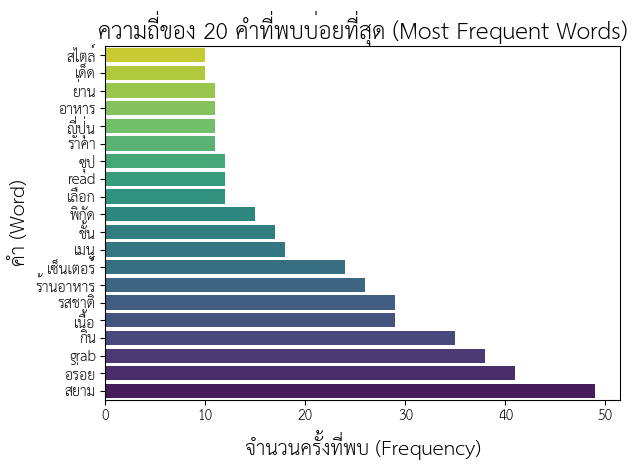

In [ ]:
font_url = 'https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf'
font_path = '/content/thsarabunnew-webfont.ttf'
thai_font_name = 'TH Sarabun New'

!wget -q $font_url -P /content/

font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

if 'filtered_tokens' in locals() and filtered_tokens:
    token_counts = Counter(filtered_tokens)
    top_n = 20
    most_common_words = token_counts.most_common(top_n)
    if not most_common_words:
        print("No words found to plot after filtering.")
    else:
        words, counts = zip(*most_common_words)
        sns.barplot(x=list(counts), y=list(words), palette="viridis", hue=list(words), legend=False)

        plt.title(f'ความถี่ของ {top_n} คำที่พบบ่อยที่สุด (Most Frequent Words)', fontsize=16)
        plt.xlabel('จำนวนครั้งที่พบ (Frequency)', fontsize=14)
        plt.ylabel('คำ (Word)', fontsize=14)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
else:
    print("ไม่สามารถสร้างแผนภูมิได้: 'filtered_tokens' ว่างเปล่าหรือยังไม่ได้คำนวณ")

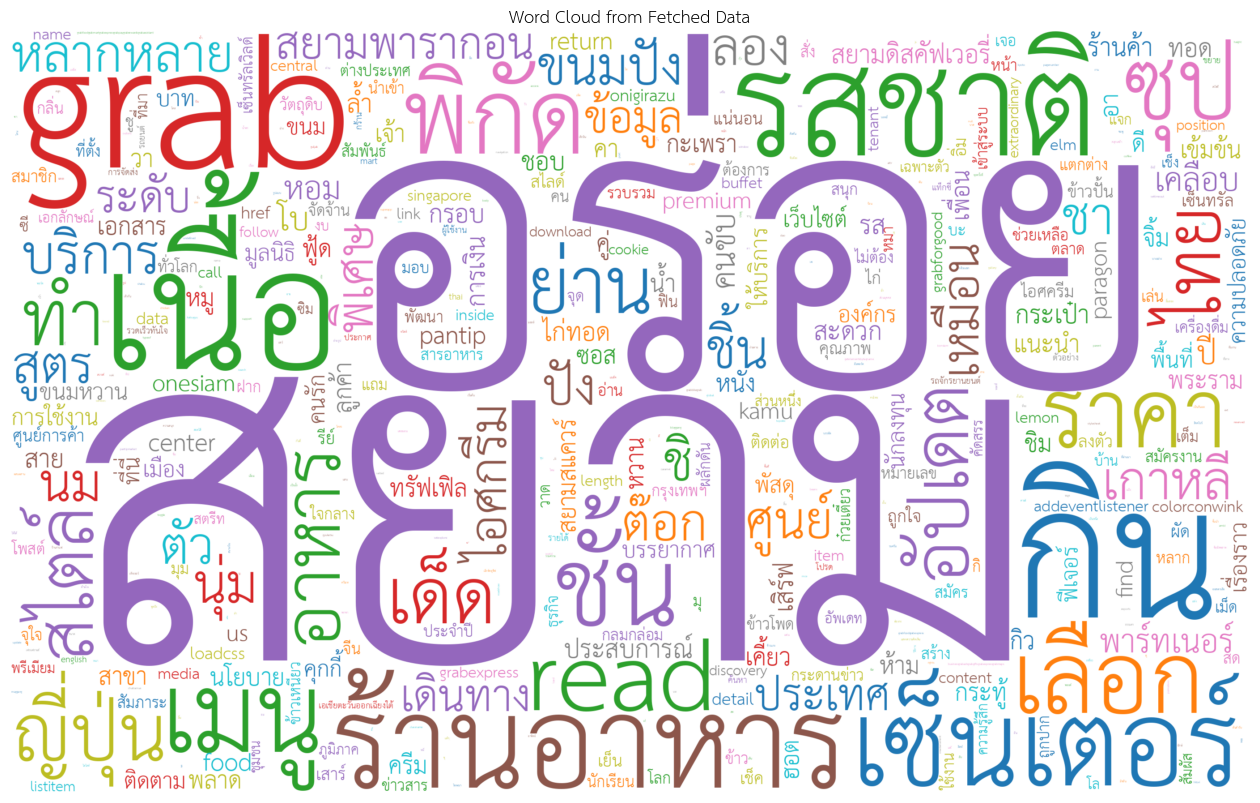

In [ ]:
wordcloud_text = " ".join(filtered_tokens)
font_path = '/content/thsarabunnew-webfont.ttf'
wordcloud = WordCloud(
                         font_path=font_path,
                         stopwords=thai_stopwords(),
                         relative_scaling=0.3,
                         min_font_size=1,
                         background_color = "white",
                         width=924,
                         height=568,
                         max_words=500,
                         colormap='tab10',
                         scale=3,
                         font_step=4,
                         collocations=False,
                         regexp=r"[ก-๙a-zA-Z']+",
                         margin=2
                         ).generate(wordcloud_text)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Word Cloud from Fetched Data")
plt.show()

In [ ]:
if 'all_fetched_text' in locals() and all_fetched_text:

    bigrams = list(nltk.ngrams(filtered_tokens, 2))
    trigrams = list(nltk.ngrams(filtered_tokens, 3))

    meat_bigrams = [gram for gram in bigrams if 'เนื้อ' in gram]
    meat_trigrams = [gram for gram in trigrams if 'เนื้อ' in gram]

    bigram_counts = Counter(meat_bigrams)
    trigram_counts = Counter(meat_trigrams)

    print("\n--- Top 5 Bigrams (คำคู่) ที่เกี่ยวกับ 'เนื้อ' ---")
    for gram, count in bigram_counts.most_common(5):
        print(f"{' '.join(gram)}: {count} ครั้ง")

    print("\n--- Top 5 Trigrams (กลุ่มสามคำ) ที่เกี่ยวกับ 'เนื้อ' ---")
    for gram, count in trigram_counts.most_common(5):
        print(f"{' '.join(gram)}: {count} ครั้ง")


--- Top 5 Bigrams (คำคู่) ที่เกี่ยวกับ 'เนื้อ' ---
เนื้อ วา: 5 ครั้ง
เนื้อ นุ่ม: 4 ครั้ง
เนื้อ สไลด์: 3 ครั้ง
เนื้อ คุณภาพ: 2 ครั้ง
กรอบ เนื้อ: 2 ครั้ง

--- Top 5 Trigrams (กลุ่มสามคำ) ที่เกี่ยวกับ 'เนื้อ' ---
เนื้อ วา กิว: 4 ครั้ง
เนื้อ น่อง ลาย: 2 ครั้ง
กะเพรา เนื้อ สไลด์: 2 ครั้ง
รสเค็ม ปะแล่ม เนื้อ: 1 ครั้ง
ปะแล่ม เนื้อ นุ่ม: 1 ครั้ง


In [ ]:
if 'all_fetched_text' in locals() and all_fetched_text:
    bigrams = list(nltk.ngrams(filtered_tokens, 2))
    trigrams = list(nltk.ngrams(filtered_tokens, 3))

    flavour_bigrams = [gram for gram in bigrams if 'รสชาติ' in gram]
    flavour_trigrams = [gram for gram in trigrams if 'รสชาติ' in gram]

    bigram_counts_flavour = Counter(flavour_bigrams)
    trigram_counts_flavour = Counter(flavour_trigrams)

    print("\n--- Top 5 Bigrams (คำคู่) ที่เกี่ยวกับ 'รสชาติ' ---")
    for gram, count in bigram_counts_flavour.most_common(5):
        print(f"{' '.join(gram)}: {count} ครั้ง")

    print("\n--- Top 5 Trigrams (กลุ่มสามคำ) ที่เกี่ยวกับ 'รสชาติ' ---")
    for gram, count in trigram_counts_flavour.most_common(5):
        print(f"{' '.join(gram)}: {count} ครั้ง")

else:
    print("Error: 'all_fetched_text' variable not found or is empty. Please run the cell to fetch text first.")


--- Top 5 Bigrams (คำคู่) ที่เกี่ยวกับ 'รสชาติ' ---
รสชาติ เข้มข้น: 3 ครั้ง
รสชาติ เอ็กซ์คลูซีฟ: 2 ครั้ง
รสชาติ กลมกล่อม: 2 ครั้ง
เลือก รสชาติ: 2 ครั้ง
รสชาติ กรอบ: 2 ครั้ง

--- Top 5 Trigrams (กลุ่มสามคำ) ที่เกี่ยวกับ 'รสชาติ' ---
รสชาติ เข้มข้น จัดจ้าน: 2 ครั้ง
รสชาติ กรอบ นุ่ม: 2 ครั้ง
ที่ผ่านมา กระแส รสชาติ: 1 ครั้ง
กระแส รสชาติ สมราคา: 1 ครั้ง
รสชาติ สมราคา เพื่อน: 1 ครั้ง


##คำถาม

###คำถามที่ 1 : จากข้อมูลรีวิวทั้งหมด ถ้าให้สรุปในประโยคเดียว คุณคิดว่าอะไรคือ "หัวใจหลัก" ที่ลูกค้าในย่านสยามใช้ตัดสินว่าร้านอาหาร "ดี" หรือ "ไม่ดี" ?


คำตอบ: อร่อย ,รสชาติอาหารเข้มข้น จัดจ้าน  

###คำถามที่ 2 :มี Insight อะไรที่น่าประหลาดใจที่สุดจากการวิเคราะห์ครั้งนี้บ้าง?"


คำตอบ : Insight ที่น่าสนใจที่สุดคือ ความถี่ของคำว่า 'Grab' ที่สูงมากจนเกือบจะเทียบเท่าคำว่า อร่อย แต่ปกติเรามักจะคิดว่ารสชาติคือทุกสิ่ง แต่ข้อมูลนี้แสดงให้เห็นว่า 'แพลตฟอร์ม' ได้เข้ามาเป็นส่วนหนึ่งของประสบการณ์การกินของผู้คนในย่านสยาม

###คำถามที่ 3  : จากข้อมูลภาพรวม เราทราบว่า 'เนื้อ' เป็นหนึ่งในคำที่ถูกพูดถึงบ่อยที่สุด สามารถนำไปวิเคราะห์อย่างไรบ้าง


คำตอบ : เนื้อ เป็นคำที่มีความถี่สูงจากการรวบรีวิว ตีความได้หลายอย่าง คือ เนื้อประเภทต่างๆ เนื้อสไลด์, เนื้อวากิล , เนื้อนุ่ม และมีการพูดว่า
เนื้อ คุณภาพ (จากการ analyze 2- gram) พวกเราจึงตีความได้ว่า ไปสยามให้ไปลองเมนูเนื้อต่างๆ


-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * ตอบคำถามต่าง ๆ ใน Notebook
    * อธิบายวิธีการที่ใช้ และแสดง screenshots ของผลลัพธ์ที่ได้จาก Python Notebook โดยแสดงภาพและตาราง โดยไม่จำเป็นที่จะต้องนำเสนอ source code

** Note: แต่ละกลุ่มส่งแค่ครั้งเดียว **